In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


In [3]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))
xshape = x_train.shape[1:4]


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
NNmodel2 = tf.keras.models.Sequential()
NNmodel2.add(tf.keras.layers.Conv2D(filters=150,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))
NNmodel2.add(tf.keras.layers.Conv2D(filters=80,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape))
NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=1))
NNmodel2.add(tf.keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape))
NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=1))
NNmodel2.add(tf.keras.layers.Flatten())
NNmodel2.add(tf.keras.layers.Dense(256,activation=tf.nn.sigmoid,kernel_regularizer = tf.keras.regularizers.l1(0.0001)))
NNmodel2.add(tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0001)))
NNmodel2.add(tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0001)))
NNmodel2.add(tf.keras.layers.Dense(32,activation=tf.nn.sigmoid,kernel_regularizer = tf.keras.regularizers.l1(0.0001)))
NNmodel2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

2023-02-19 18:39:59.082089: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 150)       3900      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 150)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 80)        108080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 80)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 30)          21630     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 30)         0

In [15]:
NNmodel2.fit(x_train,y_train,epochs=5,validation_split=0.2,batch_size=500)


Epoch 1/5
96/96 [==============================] - 52s 541ms/step - loss: 0.1057 - accuracy: 0.9944 - val_loss: 0.1127 - val_accuracy: 0.9915
Epoch 2/5
96/96 [==============================] - 58s 606ms/step - loss: 0.0874 - accuracy: 0.9974 - val_loss: 0.1044 - val_accuracy: 0.9923
Epoch 3/5
96/96 [==============================] - 63s 656ms/step - loss: 0.0805 - accuracy: 0.9980 - val_loss: 0.0991 - val_accuracy: 0.9922
Epoch 4/5
96/96 [==============================] - 82s 852ms/step - loss: 0.0760 - accuracy: 0.9982 - val_loss: 0.0959 - val_accuracy: 0.9918
Epoch 5/5
96/96 [==============================] - 65s 682ms/step - loss: 0.0727 - accuracy: 0.9984 - val_loss: 0.0943 - val_accuracy: 0.9918


In [16]:
NNmodel2.predict(x_test)


313/313 [==============================] - 4s 12ms/step


array([[1.4116545e-06, 3.6897682e-04, 2.3384223e-04, ..., 9.9878079e-01,
        2.8622751e-05, 2.8941719e-04],
       [1.6440448e-04, 3.0861935e-04, 9.9828267e-01, ..., 1.3610881e-04,
        3.3482202e-04, 3.0365924e-05],
       [1.1452247e-04, 9.9891043e-01, 1.5512883e-04, ..., 3.8165547e-04,
        1.3694183e-04, 7.2946018e-06],
       ...,
       [5.8458672e-06, 1.0488492e-04, 9.0586829e-05, ..., 1.1965778e-04,
        2.7359941e-04, 5.8203889e-04],
       [1.2529216e-04, 2.2391696e-05, 2.3957793e-06, ..., 9.7798431e-05,
        3.6807032e-04, 7.5613393e-04],
       [2.1336126e-04, 6.4517480e-05, 1.2371164e-04, ..., 8.0009668e-06,
        2.4870370e-04, 7.5161870e-07]], dtype=float32)

In [46]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))


313/313 [==============================] - 6s 19ms/step
0.9936


This model gives an accuracy of 99.18% on the validation set and an accuracy of 99.36% on the test dataset. We now use this model to be trained on the whole training set and check it's accuracy on the test dataset.

In [193]:
NNmodel2.fit(x_train,y_train,epochs=5,batch_size=500) #No Validation split

Epoch 1/5
120/120 [==============================] - 51s 422ms/step - loss: 1.7454 - accuracy: 0.7232
Epoch 2/5
120/120 [==============================] - 63s 526ms/step - loss: 0.5828 - accuracy: 0.9691
Epoch 3/5
120/120 [==============================] - 67s 561ms/step - loss: 0.4032 - accuracy: 0.9787
Epoch 4/5
120/120 [==============================] - 80s 669ms/step - loss: 0.3270 - accuracy: 0.9823
Epoch 5/5
120/120 [==============================] - 72s 600ms/step - loss: 0.2826 - accuracy: 0.9840


In [195]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 3s 10ms/step
0.9853


Training this model on the whole training dataset performs poorly on the test dataset as the accuracy drops to 98.53% on the test dataset. This is possibly due to overfitting on the training dataset.

In [38]:
NNmodel2.save('MyModel')

INFO:tensorflow:Assets written to: MyModel/assets


INFO:tensorflow:Assets written to: MyModel/assets


In [7]:
from keras.models import load_model
model = load_model('MyModel')

In [8]:
pred_probs2 = model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 6s 19ms/step
0.9936


Capturing some results of misclassifications for the website

In [9]:
y=x_test[pred2!=y_test][16]

In [10]:
y_test[pred2!=y_test][16]# actual

7

In [11]:
pred2[pred2!=y_test][16]#predicted

9

In [12]:
pd.DataFrame(y_test[pred2!=y_test]).value_counts()

9    12
6    10
5     8
7     7
3     6
4     6
8     5
1     4
0     3
2     3
dtype: int64

In [13]:
np.savetxt("misclassified 7 as 9.csv",y.reshape(28,28), delimiter=",")

In [14]:
def display_image_uploaded(file):
    k=plt.imshow(file, cmap=plt.cm.gray_r)  
    plt.axis='off'
    return k

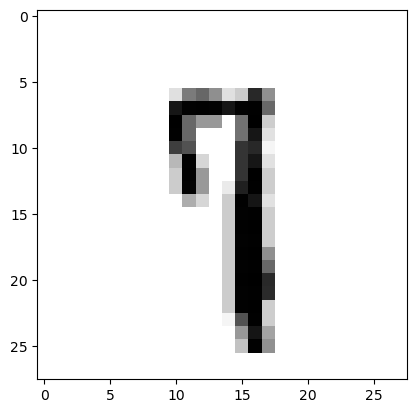

In [15]:
display_image_uploaded(y)


In [16]:
#!pip install anvil-uplink

In [17]:
import anvil.server
anvil.server.connect("ZQJRD3KA5LEI3NABPXFSVB6C-HTMVW62S2VAY2AIW")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Development" as SERVER


In [18]:
@anvil.server.callable
def predict_num(inputarray):
    formatted=np.expand_dims(inputarray, axis=0)
    inputtopredict=np.expand_dims(formatted, axis=3)
    return_value = np.argmax(model.predict(inputtopredict), axis=1)[0]
    return return_value

In [ ]:
anvil.server.wait_forever()